In [2]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

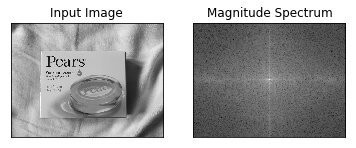

In [3]:
image = cv2.imread("soap.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

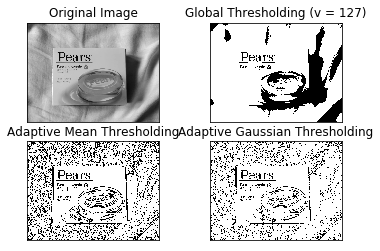

In [4]:
img = cv2.medianBlur(image,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [16]:
corners_window = 'Corners detected'
def cornerHarris_demo(val):
    thresh = val
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.04
    # Detecting corners
    dst = cv2.cornerHarris(image, blockSize, apertureSize, k)
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
    # Drawing a circle around corners
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i,j]) > thresh:
                cv2.circle(dst_norm_scaled, (j,i), 5, (0), 2)
    # Showing the result
    cv2.namedWindow(corners_window)
    cv2.imshow(corners_window, dst_norm_scaled)

In [ ]:
source_window = 'Source image'
max_thresh = 255
cv2.namedWindow(source_window)
thresh = 200 # initial threshold
cv2.createTrackbar('Threshold: ', source_window, thresh, max_thresh, cornerHarris_demo)
cv2.imshow(source_window, image)
cornerHarris_demo(thresh)
cv2.waitKey()

(Text(0.5,1,'Input Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

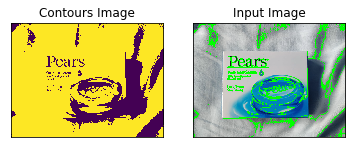

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
im = cv2.imread('Soap.jpeg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.subplot(121), plt.imshow(im2)
plt.title('Contours Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(im)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
